In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_6924/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("project1.csv")

In [3]:
df.shape

(131165, 12)

In [4]:
df.size

1573980

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131165 entries, 0 to 131164
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         131165 non-null  object
 1   Date of Birth     131165 non-null  object
 2   Name              93658 non-null   object
 3   DateTime          131165 non-null  object
 4   MonthYear         131165 non-null  object
 5   Outcome Type      131125 non-null  object
 6   Outcome Subtype   65810 non-null   object
 7   Animal Type       131165 non-null  object
 8   Sex upon Outcome  131165 non-null  object
 9   Age upon Outcome  131165 non-null  object
 10  Breed             131165 non-null  object
 11  Color             131165 non-null  object
dtypes: object(12)
memory usage: 12.0+ MB


In [6]:
df.head()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A680855,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
1,A680857,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
2,A680858,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
3,A680859,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black
4,A680860,5/25/14,NaN,2014-06-10T00:00:00-05:00,Jun-14,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black


In [7]:
df.describe()

,Animal ID,Date of Birth,Name,DateTime,MonthYear,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
count,131165,131165,93658,131165,131165,131125,65810,131165,131165,131165,131165,131165
unique,121258,7764,25493,108705,140,2,9,4,5,45,2527,599
top,A754989,4/21/14,Luna,2016-04-18T00:00:00-05:00,Jun-19,Adoption,Partner,Dog,Neutered Male,2 months,Domestic Shorthair Mix,Black/White
freq,8,104,556,39,1766,83591,39255,68064,49042,22473,30577,14017


In [8]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

df = df.drop_duplicates()

Number of duplicate rows: 17


In [9]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Animal ID               0
Date of Birth           0
Name                37503
DateTime                0
MonthYear               0
Outcome Type           40
Outcome Subtype     65346
Animal Type             0
Sex upon Outcome        0
Age upon Outcome        0
Breed                   0
Color                   0
dtype: int64


In [10]:
df = df.drop(columns=['Name'], errors='ignore')

df['Outcome Type'] = df['Outcome Type'].fillna(df['Outcome Type'].mode()[0])

df['Outcome Subtype'] = df['Outcome Subtype'].fillna("Unknown")

print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Animal ID           0
Date of Birth       0
DateTime            0
MonthYear           0
Outcome Type        0
Outcome Subtype     0
Animal Type         0
Sex upon Outcome    0
Age upon Outcome    0
Breed               0
Color               0
dtype: int64


In [11]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df['MonthYear'] = pd.to_datetime(df['MonthYear'], errors='coerce')

df[['Date of Birth','DateTime','MonthYear']].head()

/tmp/ipykernel_6924/2067279135.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
/tmp/ipykernel_6924/2067279135.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['MonthYear'] = pd.to_datetime(df['MonthYear'], errors='coerce')


,Date of Birth,DateTime,MonthYear
0,2014-05-25,2014-06-10 00:00:00-05:00,NaT
1,2014-05-25,2014-06-10 00:00:00-05:00,NaT
2,2014-05-25,2014-06-10 00:00:00-05:00,NaT
3,2014-05-25,2014-06-10 00:00:00-05:00,NaT
4,2014-05-25,2014-06-10 00:00:00-05:00,NaT


In [12]:
# code below was generated by AI
def convert_age(val):
    if pd.isnull(val):
        return None
    try:
        num, unit = val.split()[:2]  
        num = float(num)
        unit = unit.lower()
        if "year" in unit:
            return num * 365
        elif "month" in unit:
            return num * 30
        elif "week" in unit:
            return num * 7
        elif "day" in unit:
            return num
    except:
        return None

df['AgeDays'] = df['Age upon Outcome'].apply(convert_age)
df['AgeDays'].describe()


count    131148.000000
mean        575.028037
std         876.424175
min           1.000000
25%          60.000000
50%         240.000000
75%         730.000000
max       10950.000000
Name: AgeDays, dtype: float64

In [13]:
df = df.drop(columns=['Animal ID', 'MonthYear'], errors='ignore')
df.head()

,Date of Birth,DateTime,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,AgeDays
0,2014-05-25,2014-06-10 00:00:00-05:00,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,14.0
1,2014-05-25,2014-06-10 00:00:00-05:00,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,14.0
2,2014-05-25,2014-06-10 00:00:00-05:00,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,14.0
3,2014-05-25,2014-06-10 00:00:00-05:00,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,14.0
4,2014-05-25,2014-06-10 00:00:00-05:00,Transfer,Partner,Bird,Unknown,2 weeks,Duck,Yellow/Black,14.0


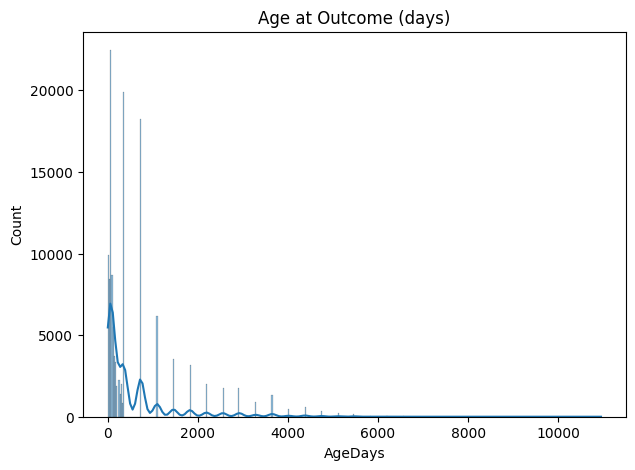

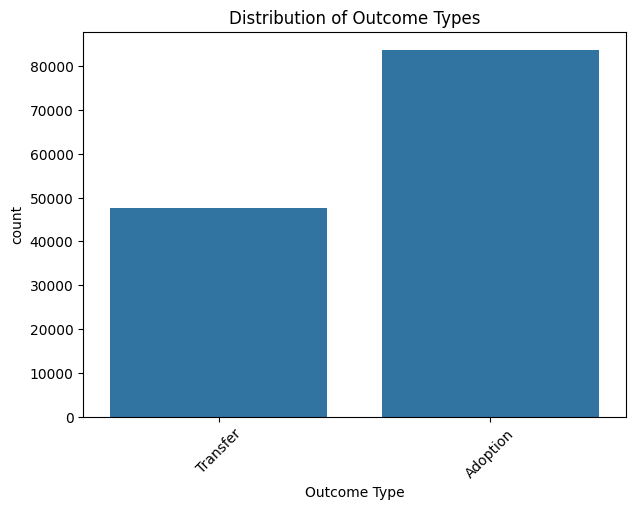

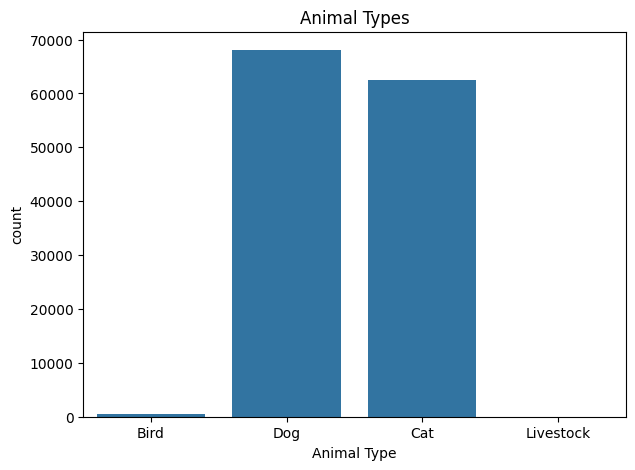

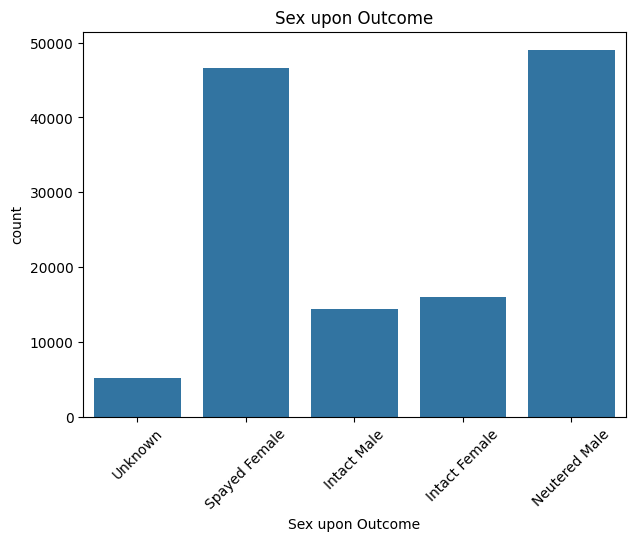

In [14]:
# Age distribution
plt.figure(figsize=(7,5))
sns.histplot(df['AgeDays'].dropna(), kde=True)
plt.title("Age at Outcome (days)")
plt.show()

# Outcome Type
plt.figure(figsize=(7,5))
sns.countplot(x='Outcome Type', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Outcome Types")
plt.show()

# Animal Type
plt.figure(figsize=(7,5))
sns.countplot(x='Animal Type', data=df)
plt.title("Animal Types")
plt.show()

# Sex upon Outcome
plt.figure(figsize=(7,5))
sns.countplot(x='Sex upon Outcome', data=df)
plt.xticks(rotation=45)
plt.title("Sex upon Outcome")
plt.show()

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
print("Final encoded shape:", df_encoded.shape)
df_encoded.head()

Final encoded shape: (131148, 3188)


,Date of Birth,DateTime,AgeDays,Outcome Type_Transfer,Outcome Subtype_Emer,Outcome Subtype_Foster,Outcome Subtype_In State,Outcome Subtype_Offsite,Outcome Subtype_Out State,Outcome Subtype_Partner,...,Color_Yellow/Brown,Color_Yellow/Cream,Color_Yellow/Gray,Color_Yellow/Green,Color_Yellow/Orange,Color_Yellow/Orange Tabby,Color_Yellow/Red,Color_Yellow/Tan,Color_Yellow/White,Color_Yellow/Yellow
0,2014-05-25,2014-06-10 00:00:00-05:00,14.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2014-05-25,2014-06-10 00:00:00-05:00,14.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2014-05-25,2014-06-10 00:00:00-05:00,14.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2014-05-25,2014-06-10 00:00:00-05:00,14.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2014-05-25,2014-06-10 00:00:00-05:00,14.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


**Part 2**

In [16]:
df_encoded = df_encoded.drop(columns=['Breed'], errors='ignore')

In [17]:
y = df['Outcome Type'] 

X = df.drop(columns=['Outcome Type', 'Outcome upon Outcome'], errors='ignore')

X = pd.get_dummies(X, drop_first=True)

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Feature shape: (131148, 3187)
Target distribution:
 Outcome Type
Adoption    83620
Transfer    47528
Name: count, dtype: int64


In [18]:
X = X.drop(columns=['Date of Birth', 'DateTime', 'MonthYear'], errors='ignore')
X = X.select_dtypes(include=['number'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=1)

In [20]:
print("Training shape:", X_train.shape)

Training shape: (91803, 1)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

knn = KNeighborsClassifier(n_neighbors=3)  # start with k=3
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn, pos_label='Adoption'))
print("Precision:", precision_score(y_test, y_pred_knn, pos_label='Adoption'))
print("F1:", f1_score(y_test, y_pred_knn, pos_label='Adoption'))

Accuracy: 0.6984369043080442
Recall: 0.8410667304472614
Precision: 0.7281292059219381
F1: 0.7805338216525164


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Drop any non-numeric columns in case they reappeared
X_train = X_train.select_dtypes(include=['number'])
X_test = X_test.select_dtypes(include=['number'])

# Sample subset to prevent memory overload
X_sample = X_train.sample(2000, random_state=42)
y_sample = y_train.loc[X_sample.index]

param_grid = {'n_neighbors': [3, 5, 7]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=1)
print("Running GridSearchCV... (this may take a minute)")
grid.fit(X_sample, y_sample)
print("Best k:", grid.best_params_)

best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test)

Running GridSearchCV... (this may take a minute)
Best k: {'n_neighbors': 5}


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}
# code below was generated by AI
grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[3,5,7]}, cv=3, n_jobs=-1)
# ----
grid.fit(X_train, y_train)

print("Best k:", grid.best_params_)
best_knn = grid.best_estimator_

y_pred_best = best_knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best, pos_label='Adoption'))
print("Precision:", precision_score(y_test, y_pred_best, pos_label='Adoption'))
print("F1:", f1_score(y_test, y_pred_best, pos_label='Adoption'))

Best k: {'n_neighbors': 3}
Accuracy: 0.6984369043080442
Recall: 0.8410667304472614
Precision: 0.7281292059219381
F1: 0.7805338216525164


In [24]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="perceptron", alpha=0.05, random_state=1)
clf.fit(X_train, y_train)
y_pred_linear = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Recall:", recall_score(y_test, y_pred_linear, pos_label='Adoption'))
print("Precision:", precision_score(y_test, y_pred_linear, pos_label='Adoption'))
print("F1:", f1_score(y_test, y_pred_linear, pos_label='Adoption'))

Accuracy: 0.3624094548227221
Recall: 0.0


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
F1: 0.0


In [26]:
from sklearn.linear_model import LogisticRegression

# Train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr, pos_label='Adoption'))


Logistic Regression Results:
Accuracy: 0.637590545177278
F1 Score: 0.7786934860548494


In [27]:
from sklearn.metrics import accuracy_score, f1_score

results = {
    'Model': ['KNN (n=5)', 'KNN (GridSearch)', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_best),
        accuracy_score(y_test, y_pred_lr)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_knn, pos_label='Adoption'),
        f1_score(y_test, y_pred_best, pos_label='Adoption'),
        f1_score(y_test, y_pred_lr, pos_label='Adoption')
    ]
}

import pandas as pd
summary_df = pd.DataFrame(results)
print(summary_df)

                 Model  Accuracy  F1 Score
0            KNN (n=5)  0.698437  0.780534
1     KNN (GridSearch)  0.698437  0.780534
2  Logistic Regression  0.637591  0.778693
